# Matplotlib examples

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from IPython.core.pylabtools import figsize

%matplotlib inline
figsize(6, 6)


# Big picture

Reference: https://brohrer.github.io/matplotlib_going_deeper.html 

1. Figures hold Axes
2. Axes hold almost everything else
3. Backends do the heavy lifting

> "The name "Axes" is a little misleading. An Axes object contains both an x-axis and a y-axis (which are objects in their own right), as well as lines, patches, text annotations, and the region in which these are displayed. Throughout these examples, I'll try to be consistent about referring to an Axes object as Axes and an x- and y-axis pair as axes, lowercase."


## Two separate layers of Matlplotlib
This post gives some background: http://www.aosabook.org/en/matplotlib.html 

When you write code using the `Artist` layer, you usually start with `fig, ax = plt.subplots()` 

When writing using the scripting layer, you write stuff like `plt.hist()`

Although the scripting approach is quicker off the ground, it won't work well for customizations. 

Again from [this link](https://brohrer.github.io/matplotlib_going_deeper.html):

> To keep things as clean as possible in our code examples, we will usually work directly with the Figure and Axes objects, rather than using the pyplot simplifications that gloss over them. It turns out that if we want to do much customization, this makes our job a lot easier.

> Matplotlib has several ways to do most things, and while this can provide convenience, it can also create a lot of confusion. We will stick to one way of doing things, usually the one that most clearly reflects the underlying structure, rather than the one that results in the shortest code. This also gives us fewer things to remember.

In [ ]:
x = np.random.randn(10000)


Text(0.5,1,'Normal distribution with $\\mu=0, \\sigma=1$')

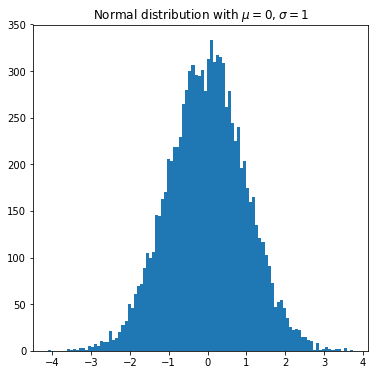

In [8]:
fig, ax = plt.subplots()  
# try "type(plt.subplots())" - you'll see that it returns a tuple. This is unpacked and bound to the fig and ax variables. 

# Note that type(plt.subplot()) does not return a tuple, and so can't be unpacked into fig and ax. 

ax.hist(x, 100)  # use hist() method of the axis instance to show a histogram 
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')


(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   2.,   1.,   3.,
          3.,   1.,   5.,   4.,   7.,   5.,  10.,   9.,   9.,  21.,  12.,
         14.,  20.,  28.,  32.,  50.,  46.,  61.,  70.,  72.,  89., 105.,
         99., 106., 146., 145., 163., 170., 206., 204., 218., 219., 229.,
        265., 280., 300., 306., 296., 295., 301., 278., 313., 333., 310.,
        317., 315., 309., 261., 279., 244., 225., 240., 196., 203., 174.,
        160., 165., 135., 121., 117., 103.,  91.,  73.,  47.,  52.,  54.,
         46.,  35.,  26.,  22.,  23.,  22.,  15.,  15.,  12.,  11.,   1.,
          8.,   1.,   2.,   4.,   2.,   1.,   2.,   2.,   0.,   3.,   0.,
          1.]),
 array([-4.09951743, -4.02112531, -3.94273319, -3.86434107, -3.78594894,
        -3.70755682, -3.6291647 , -3.55077258, -3.47238046, -3.39398834,
        -3.31559621, -3.23720409, -3.15881197, -3.08041985, -3.00202773,
        -2.92363561, -2.84524348, -2.76685136, -2.68845924, -2.61006712,
        -2.531675  , -2.45

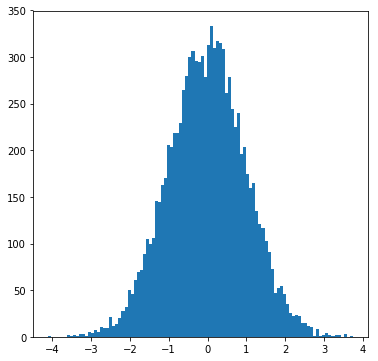

In [10]:
# now do the same with the scripting layer: 

plt.hist(x, 100)  # you may have to scroll to see the plot 

# Eg 1: Separate line plots with shared x-axis

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py

In [2]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

In [3]:
type(s1)

numpy.ndarray

Most real data will come in DataFrames, so let's create a df for this. 

In [4]:
df1 = pd.DataFrame({'sin_fn':s1, 'exp_fn':s2}, index = t)

In [5]:
df1.head()


,sin_fn,exp_fn
0.01,0.062791,0.990050
0.02,0.125333,0.980199
0.03,0.187381,0.970446
0.04,0.248690,0.960789
0.05,0.309017,0.951229


In [6]:
df1.columns

Index(['sin_fn', 'exp_fn'], dtype='object')

In [7]:
df1.index

Float64Index([                0.01,                 0.02,                 0.03,
                              0.04,                 0.05, 0.060000000000000005,
               0.06999999999999999,                 0.08,                 0.09,
               0.09999999999999999,
              ...
                4.8999999999999995,                 4.91,                 4.92,
                              4.93,   4.9399999999999995,                 4.95,
                              4.96,                 4.97,   4.9799999999999995,
                              4.99],
             dtype='float64', length=499)

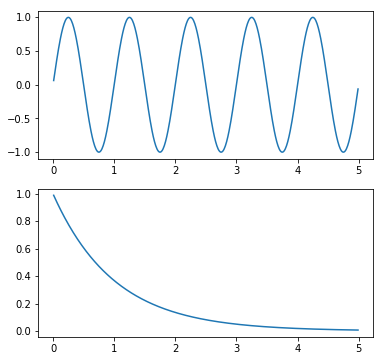

In [8]:
ax1 = plt.subplot(211)  # 2 rows, 1 col, start plotting at index 1
plt.plot(df1['sin_fn'])

ax2 = plt.subplot(212, sharex=ax1)  # 2 rows, 1 col, start at index 2
plt.plot(df1['exp_fn'])


Note that we could have plotted these as part of the same plot as below: 

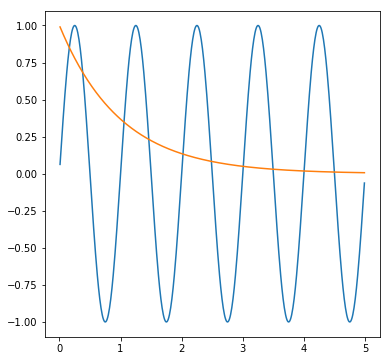

In [9]:
plt.plot(df1['sin_fn'])
plt.plot(df1['exp_fn'])

# Eg 2: Histogram

In [10]:
x = np.random.poisson(10, 5000)

df = pd.DataFrame({'pois_var':x})

(array([  51.,  321.,  762., 1158., 1204.,  839.,  404.,  184.,   63.,
           9.,    2.,    3.]),
 array([ 1.        ,  3.08333333,  5.16666667,  7.25      ,  9.33333333,
        11.41666667, 13.5       , 15.58333333, 17.66666667, 19.75      ,
        21.83333333, 23.91666667, 26.        ]),
 <a list of 12 Patch objects>)

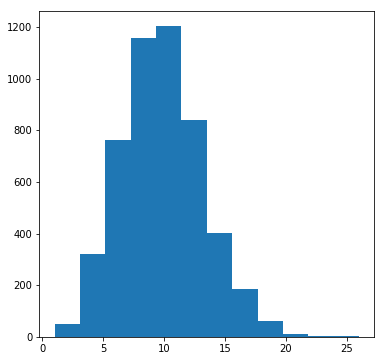

In [11]:
# plt.subplot(111)
plt.hist(df['pois_var'], bins=12)
